In [12]:
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs

from shapely.geometry import shape as Shape
import numpy as np

plt.rcParams['font.size'] = 18

## Constants

In [4]:
cities_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'France': (9742, 9588),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Rouen': (327, 373),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

## Load Data

In [5]:
city_str = 'Lyon'

n_rows, n_cols = cities_dims[city_str]

city_geojson_file = f'./data/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

In [6]:
# showing one of the features
city_geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[4.7662070878542515, 45.55631465259445],
    [4.766246657177647, 45.55721386239888],
    [4.767526651889026, 45.5571860567685],
    [4.767487061740877, 45.55628684742171],
    [4.7662070878542515, 45.55631465259445]]]},
 'properties': {'tile_id': 66}}

In [7]:
tile_id = city_geojson['features'][0]['properties']['tile_id']

row_index = int(tile_id // n_cols)
col_index = int(tile_id % n_cols)
print(f'row_index: {row_index}, col_index: {col_index}')

row_index: 0, col_index: 66


### Matrix representation

In [9]:
# let's create a mask of the city, where the value 1 indicates a valid tile and 0 an invalid tile
city_mask = np.zeros((n_rows, n_cols))

for feature in city_geojson['features']:
    tile_id = feature['properties']['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)
    city_mask[row_index, col_index] = 1

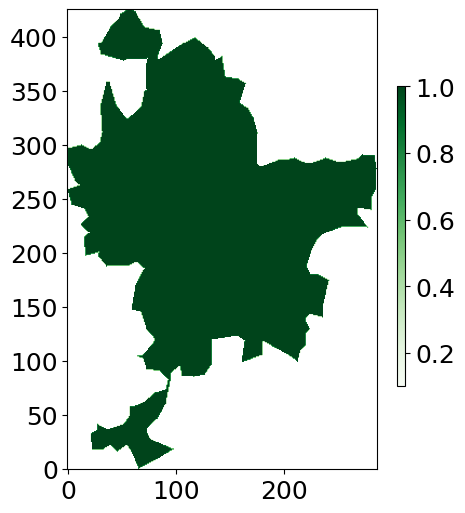

In [14]:
cmap_region = cm.get_cmap('Greens').copy()
cmap_region.set_under('w', 0)
norm_region = colrs.Normalize(vmin=0.1, vmax=1)

fig = plt.figure(figsize=(4, 6))
plt.imshow(city_mask, origin='lower', cmap=cmap_region, norm=norm_region)

cax = fig.add_axes([0.95, 0.25, 0.02, .5])
plt.colorbar(cax=cax)

plt.show()